In [ ]:
# ============= PREAMBLE =============
# Last Edited By: Luca Carnegie
# Date: March 28, 2025
# Description: OLS Modelling Work for Modern Bloom Data
# ====================================

# Package setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.discrete.discrete_model import NegativeBinomial
import statsmodels.formula.api as smf
import numpy as np

# Load dataset
df = pd.read_csv("../data/analysis_data/modern_bloom.csv")

# Rename columns for clarity
df.columns = ['year', 'flower_date', 'flower_doy', 'march_temp_c']

# Split into training (1953–2000) and testing (2010–2019)
train_df = df[df['year'] <= 2000]
test_df = df[(df['year'] >= 2009) & (df['year'] <= 2019)]

# Define X and y
X = sm.add_constant(train_df['march_temp_c'])  # Add intercept
y = train_df['flower_doy']

### Modelling with Outlier

In [30]:
# Fit the OLS model
model_0 = sm.OLS(y, X).fit()

# Output summary
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:             flower_doy   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     30.81
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           5.65e-07
Time:                        10:58:38   Log-Likelihood:                -195.46
No. Observations:                  67   AIC:                             394.9
Df Residuals:                      65   BIC:                             399.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           86.1149      0.762    112.978   

In [31]:
## Modelling with Robust HC1 SE

# Fit OLS model with robust standard errors
model_1 = sm.OLS(y, X).fit(cov_type='HC1')

# Output the summary
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:             flower_doy   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     21.08
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           2.07e-05
Time:                        10:58:38   Log-Likelihood:                -195.46
No. Observations:                  67   AIC:                             394.9
Df Residuals:                      65   BIC:                             399.3
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           86.1149      0.901     95.591   

C:\Users\lucac\AppData\Local\Temp\ipykernel_5660\1938686298.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.1, 95, f"blooming_day = {model_0.params[1]:.2f} * temp + {model_0.params[0]:.2f}", color="red", fontsize=12)


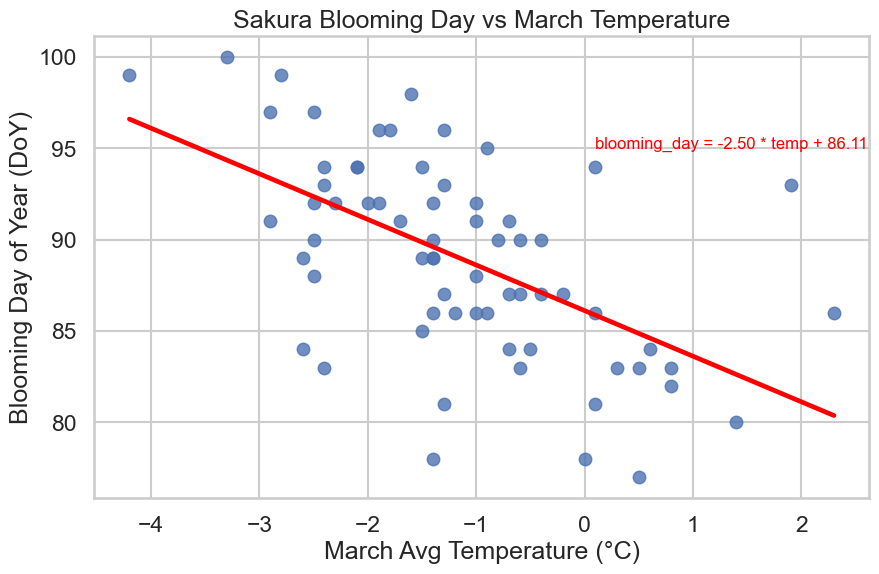

C:\Users\lucac\AppData\Local\Temp\ipykernel_5660\1938686298.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(-0.2, 95, f"blooming_day = {model_0.params[1]:.2f} * temp + {model_0.params[0]:.2f}", color="red", fontsize=12)


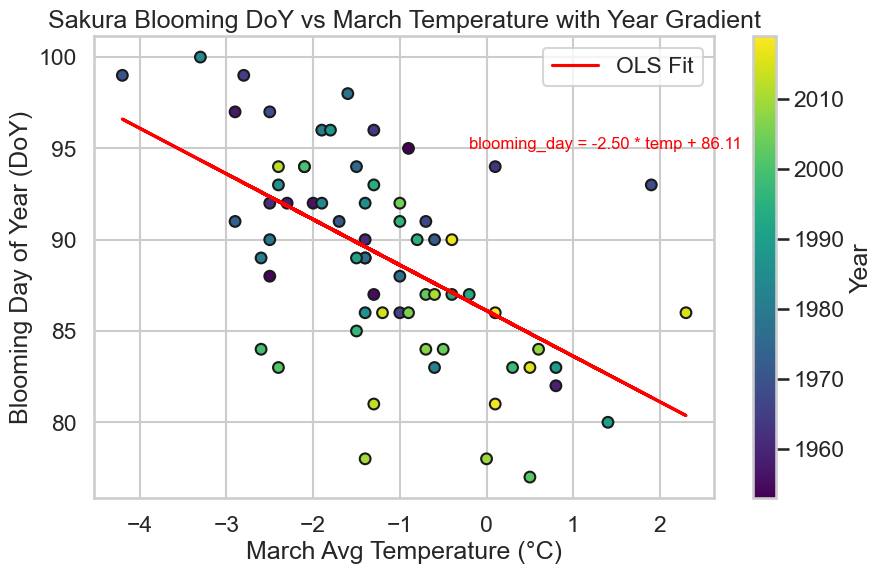

In [37]:
## Visualizations
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='march_temp_c', y='flower_doy', data=df, ci=None, line_kws={'color': 'red'})
plt.text(0.1, 95, f"blooming_day = {model_0.params[1]:.2f} * temp + {model_0.params[0]:.2f}", color="red", fontsize=12)
plt.title("Sakura Blooming Day vs March Temperature")
plt.xlabel("March Avg Temperature (°C)")
plt.ylabel("Blooming Day of Year (DoY)")
plt.show()

# Scatterplot with year-based color gradient
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['march_temp_c'], df['flower_doy'], c=df['year'], cmap='viridis', s=60, edgecolor='k')
plt.plot(df['march_temp_c'], model_0.predict(X), color='red', label='OLS Fit')
plt.text(-0.2, 95, f"blooming_day = {model_0.params[1]:.2f} * temp + {model_0.params[0]:.2f}", color="red", fontsize=12)
plt.colorbar(scatter, label='Year')
plt.title("Sakura Blooming DoY vs March Temperature with Year Gradient")
plt.xlabel("March Avg Temperature (°C)")
plt.ylabel("Blooming Day of Year (DoY)")
plt.legend()
plt.show()

#### Test Model

Evaluation on Test Set (2001–2019):
RMSE: 5.65
MAE:  4.46
R²:   -0.436


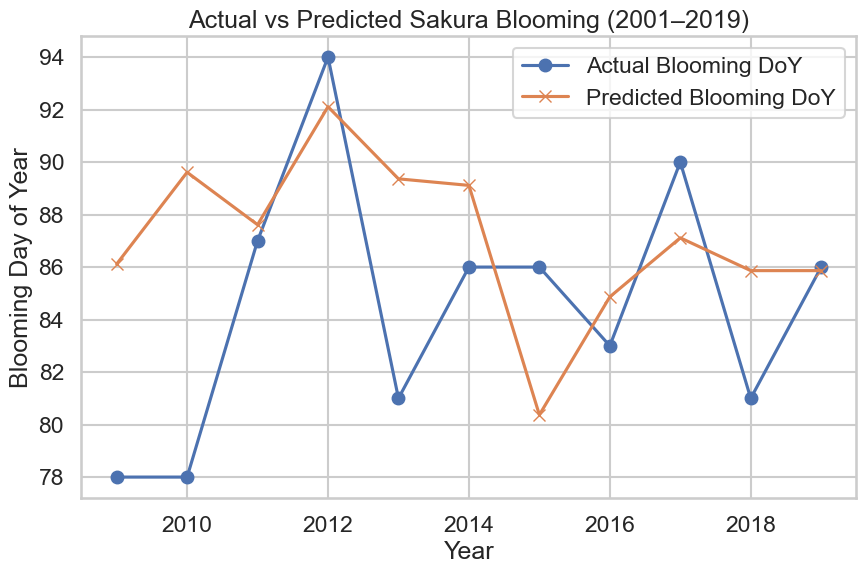

In [ ]:
##Modelling Training Dataset


# Test OLS model (nonrobust)
model_test = model_0

# Prepare test data
X_test = sm.add_constant(test_df['march_temp_c'])
y_test = test_df['flower_doy']

# Predict on test data
y_pred = model_test.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation on Test Set (2001–2019):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test_df['year'], y_test, label='Actual Blooming DoY', marker='o')
plt.plot(test_df['year'], y_pred, label='Predicted Blooming DoY', marker='x')
plt.xlabel("Year")
plt.ylabel("Blooming Day of Year")
plt.title("Actual vs Predicted Sakura Blooming (2001–2019)")
plt.legend()
plt.grid(True)
plt.show()

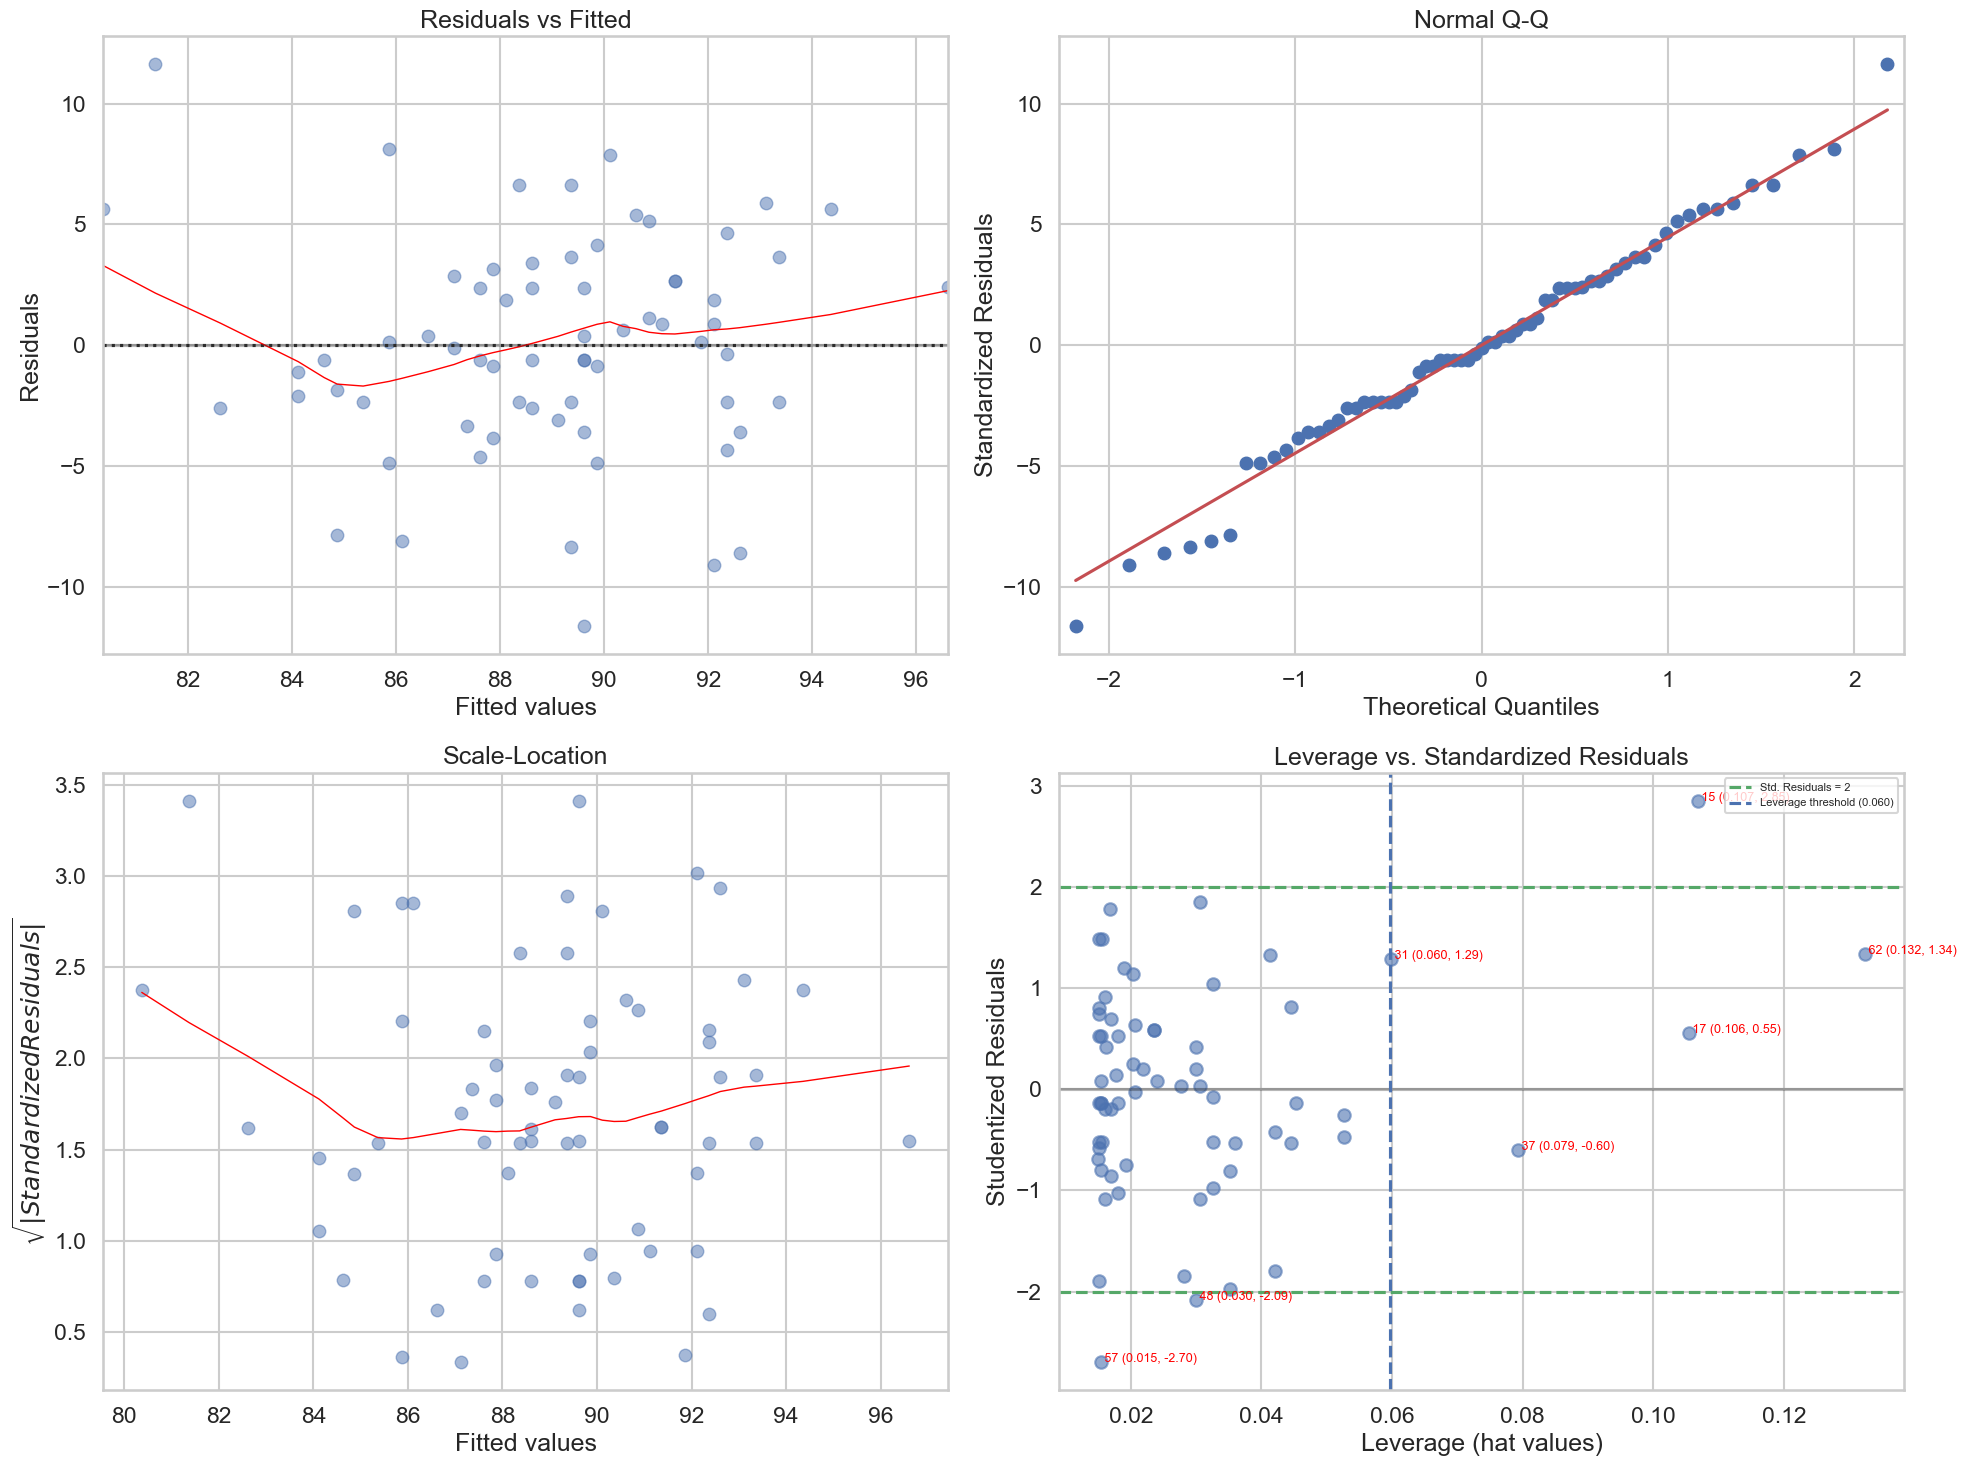

In [43]:
# Create diagnostic plots for the OLS model
fig = plt.figure(figsize=(20, 15))

# Residual vs Fitted Plot
ax1 = fig.add_subplot(2, 2, 1)
residuals = model_0.resid
fitted = model_0.fittedvalues
sns.residplot(x=fitted, y=residuals, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1}, ax=ax1)
ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# QQ Plot for Normality
ax2 = fig.add_subplot(2, 2, 2)
qqplot(model_0.resid, line='s', ax=ax2)
ax2.set_title('Normal Q-Q')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Standardized Residuals')

# Scale-Location Plot (Square root of absolute residuals vs fitted)
ax3 = fig.add_subplot(2, 2, 3)
sqrt_abs_resid = np.sqrt(np.abs(residuals))
sns.regplot(x=fitted, y=sqrt_abs_resid, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1}, ax=ax3)
ax3.set_title('Scale-Location')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('$\\sqrt{|Standardized Residuals|}$')

plt.tight_layout()

# Leverage vs. Standardized Residuals
ax4 = fig.add_subplot(2, 2, 4)
infl = model_0.get_influence()
hatvals = infl.hat_matrix_diag
stud_resid = infl.resid_studentized_external

# Determine leverage threshold
p = len(model_0.params)  # number of parameters
leverage_threshold = 2 * p / len(hatvals)

# Plot points
ax4.scatter(hatvals, stud_resid, alpha=0.6)
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Add reference lines
ax4.axhline(y=2, color='g', linestyle='--', label='Std. Residuals = 2')
ax4.axhline(y=-2, color='g', linestyle='--')
ax4.axvline(x=leverage_threshold, color='b', linestyle='--', 
           label=f'Leverage threshold ({leverage_threshold:.3f})')

# Highlight and label influential points (leverage > threshold or std. residuals > 2)
influential_points = []
for i in range(len(hatvals)):
    if (abs(stud_resid[i]) > 2) or (hatvals[i] > leverage_threshold):
        ax4.text(hatvals[i], stud_resid[i], 
                f" {i} ({hatvals[i]:.3f}, {stud_resid[i]:.2f})", 
                fontsize=9, color="red")
        influential_points.append(i)

ax4.set_title('Leverage vs. Standardized Residuals')
ax4.set_xlabel('Leverage (hat values)')
ax4.set_ylabel('Studentized Residuals')
ax4.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

### Modelling without Outliers

In [52]:
# Create a clean dataset without influential points

df_clean = df.drop(influential_points)
    
# Refit model with clean data
X_clean = sm.add_constant(df_clean['march_temp_c'])
y_clean = df_clean['flower_doy']

model_clean = sm.OLS(y_clean, X_clean).fit()
model_clean_robust = sm.OLS(y_clean, X_clean).fit(cov_type='HC1')

In [53]:
# Print comparison
print("\nOriginal model:")
print(f"Intercept: {model_0.params[0]:.4f}, Slope: {model_0.params[1]:.4f}, R²: {model_0.rsquared:.4f}")
print("\nCleaned model (without influential points):")
print(f"Intercept: {model_clean.params[0]:.4f}, Slope: {model_clean.params[1]:.4f}, R²: {model_clean.rsquared:.4f}")


Original model:
Intercept: 86.1149, Slope: -2.4975, R²: 0.3216

Cleaned model (without influential points):
Intercept: 85.1957, Slope: -3.2352, R²: 0.4103


C:\Users\lucac\AppData\Local\Temp\ipykernel_5660\3890104478.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept: {model_0.params[0]:.4f}, Slope: {model_0.params[1]:.4f}, R²: {model_0.rsquared:.4f}")
C:\Users\lucac\AppData\Local\Temp\ipykernel_5660\3890104478.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept: {model_clean.params[0]:.4f}, Slope: {model_clean.params[1]:.4f}, R²: {model_clean.rsquared:.4f}")


In [54]:
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:             flower_doy   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     40.35
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           3.55e-08
Time:                        11:25:03   Log-Likelihood:                -165.71
No. Observations:                  60   AIC:                             335.4
Df Residuals:                      58   BIC:                             339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           85.1957      0.792    107.554   

In [55]:
print(model_clean_robust.summary())

                            OLS Regression Results                            
Dep. Variable:             flower_doy   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     39.34
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           4.82e-08
Time:                        11:25:06   Log-Likelihood:                -165.71
No. Observations:                  60   AIC:                             335.4
Df Residuals:                      58   BIC:                             339.6
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           85.1957      0.775    109.917   

C:\Users\lucac\AppData\Local\Temp\ipykernel_5660\3504803602.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(-0.8, 95, f"blooming_day = {model_clean.params[1]:.2f} * temp + {model_clean.params[0]:.2f}", color="red", fontsize=12)


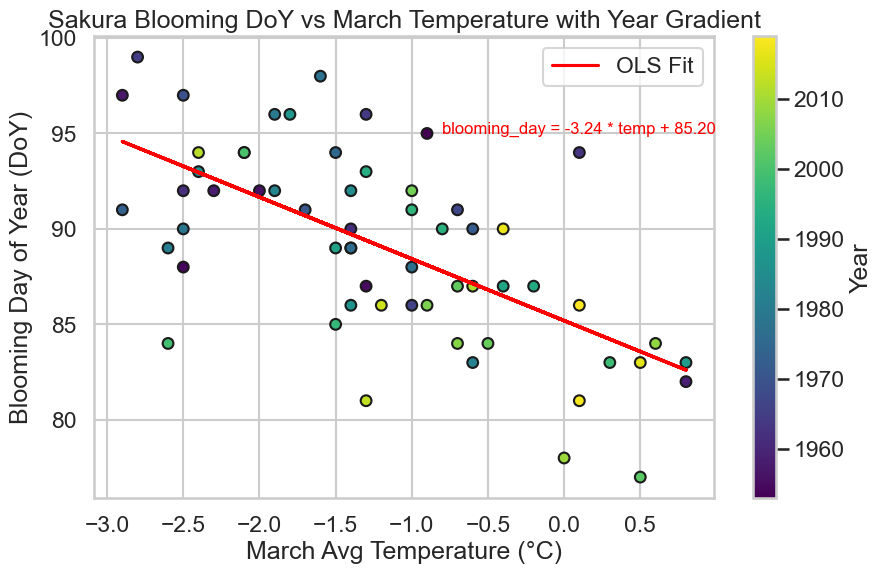

In [51]:
# Scatterplot with year-based color gradient
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clean['march_temp_c'], df_clean['flower_doy'], c=df_clean['year'], cmap='viridis', s=60, edgecolor='k')
plt.plot(df_clean['march_temp_c'], model_clean.predict(X_clean), color='red', label='OLS Fit')
plt.text(-0.8, 95, f"blooming_day = {model_clean.params[1]:.2f} * temp + {model_clean.params[0]:.2f}", color="red", fontsize=12)
plt.colorbar(scatter, label='Year')
plt.title("Sakura Blooming DoY vs March Temperature with Year Gradient")
plt.xlabel("March Avg Temperature (°C)")
plt.ylabel("Blooming Day of Year (DoY)")
plt.legend()
plt.show()

#### Test Model

Evaluation on Test Set (2001–2019):
RMSE: 5.78
MAE:  4.45
R²:   -0.501


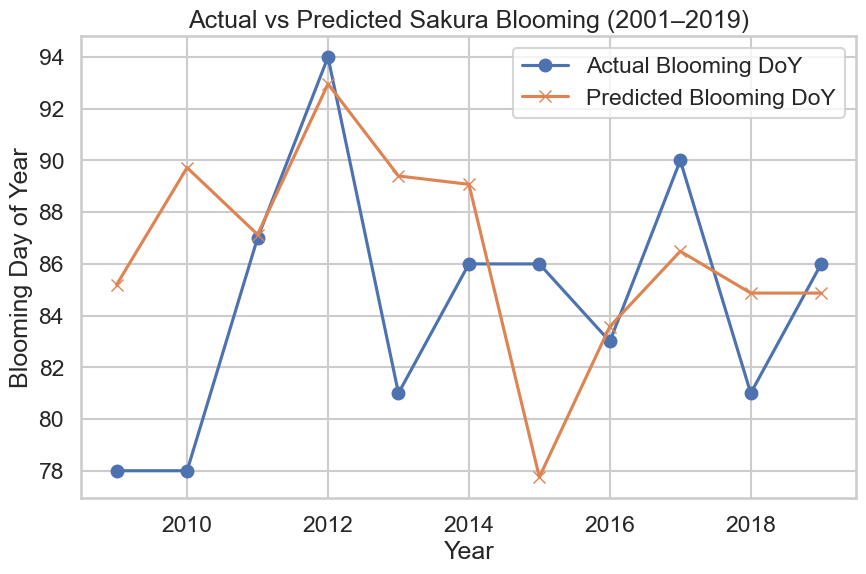

In [45]:
##Modelling Training Dataset

# Test OLS model (nonrobust)
model_test = model_clean

# Prepare test data
X_test = sm.add_constant(test_df['march_temp_c'])
y_test = test_df['flower_doy']

# Predict on test data
y_pred = model_test.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation on Test Set (2001–2019):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test_df['year'], y_test, label='Actual Blooming DoY', marker='o')
plt.plot(test_df['year'], y_pred, label='Predicted Blooming DoY', marker='x')
plt.xlabel("Year")
plt.ylabel("Blooming Day of Year")
plt.title("Actual vs Predicted Sakura Blooming (2001–2019)")
plt.legend()
plt.grid(True)
plt.show()

### 🌸 OLS Regression: Predicting Sakura Blooming Day from March Temperature with Non-Robust SE

**Model Equation:**

$$
\text{Blooming Day (DoY)} = \beta_0 + \beta_1 \cdot \text{March Temperature} + \varepsilon
$$

**Fit Summary:**
- Dependent variable: `flower_doy`
- Independent variable: `march_temp_c`
- Intercept + 1 predictor

| Coefficient        | Estimate  | Std. Error | t-value | p-value | 95% CI                  |
|--------------------|-----------|------------|---------|---------|--------------------------|
| Intercept (β₀)     | 86.1149   | 0.762      | 112.978 | <0.001  | [84.593, 87.637]          |
| March Temp (β₁)    | -2.4975   | 0.450      | -5.550  | <0.001  | [-3.396, -1.599]        |

**Model Metrics:**
- R²: **0.322**
- F-statistic: **30.81**, p < 0.001


### 🧷 OLS Regression with Robust Standard Errors (HC1)

**Model:**  
$$
\text{Blooming Day \_DoY}_i = \beta_0 + \beta_1 \cdot \text{March\_Temp}_i + \varepsilon_i
$$

**Robust SE Summary (HC1):**
- Dependent variable: `flower_doy`
- Robust (heteroskedasticity-consistent) standard errors used
- Intercept + 1 predictor

| Coefficient        | Estimate  | Robust SE | z-value | p-value | 95% CI (robust)         |
|--------------------|-----------|-----------|---------|---------|--------------------------|
| Intercept (β₀)     | 86.1149   | 0.901     | 95.591  | <0.001  | [X.XXX, X.XXX]          |
| March Temp (β₁)    | -2.4975   | 0.544     | -4.591  | <0.001  | [-Y.YYY, -Y.YYY]        |

**Model Metrics:**
- R²: **0.322**
- F-statistic: Not applicable (robust SE)